# PyTao basic usage

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


## Inititialize Tao

In [3]:
from pytao import Tao

In [4]:
tao=Tao('-init $ACC_ROOT_DIR/tao/examples/cesr/tao.init -noplot')   

## Send a command

Anything that you would normally type at a Tao> prompt can be sent as a string. The return is a list of output strings. 

In [5]:
# Tao command
tao.cmd('show lat 1:10')

['# Values shown are for the Exit End of each Element:',
 '# Index  name          key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit   Track',
 '#                                                                a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]   State',
 '      1  IP_L0         Marker                0.000   0.000    0.95   0.000  -0.00  -0.017    0.02   0.000   0.00   0.001   Alive',
 '      2  CLEO_SOL#3    Solenoid              0.622   0.622    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041   Alive',
 '      3  DET_00W       Marker                0.622   0.000    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041   Alive',
 '      4  CLEO_SOL#4    Solenoid              0.638   0.016    1.37   0.094  -0.02   1.507   22.92   0.244   0.00   0.043   Alive',
 '      5  Q00W\\CLEO_SOL Sol_Quad              1.755   1.117    7.73   0.160  -0.09   5.505   88.01   0.247  -0.01   0.486   Alive',
 '      6  

## Jupyter magic %%tao

This is an alternative way to send commands to Tao directly in the jupyter notebook, using the %%tao magic. Multiple lines can be executed.

In [6]:
%%tao
sho lat 1:10
sho ele 4

-------------------------
Tao> sho lat 1:10
# Values shown are for the Exit End of each Element:
# Index  name          key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit   Track
#                                                                a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]   State
      1  IP_L0         Marker                0.000   0.000    0.95   0.000  -0.00  -0.017    0.02   0.000   0.00   0.001   Alive
      2  CLEO_SOL#3    Solenoid              0.622   0.622    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041   Alive
      3  DET_00W       Marker                0.622   0.000    1.34   0.093  -0.02   1.470   21.81   0.244   0.00   0.041   Alive
      4  CLEO_SOL#4    Solenoid              0.638   0.016    1.37   0.094  -0.02   1.507   22.92   0.244   0.00   0.043   Alive
      5  Q00W\CLEO_SOL Sol_Quad              1.755   1.117    7.73   0.160  -0.09   5.505   88.01   0.247  -0.01   0.486   Alive


## Interface commands

Output above from the `show` command is designed to be human-readable. In general you should **not** try to parse these strings for data. For data, Tao has a special set of commands to send back data suitable for parsing in Python (or other software). 

Below are the raw commands. 

In [7]:
%%tao
help python

-------------------------
Tao> help python
The "python" command is like the "show" command in that the "python" command prints
information to the terminal. The difference is that the output from the "show" command is meant
for viewing by the user while the output of the "python" command is meant for easy
parsing. Format:
  python {-append <file_name>} {-noprint} <what_to_print>
  python {-write <file_name>} {-noprint} <what_to_print>

The "python" command has "-append" and "-write" optional arguments which can be used to
write the results to a file. The "python -append" command will appended to the output file. The
"python -write" command will first erase the contents of the output file. Example:
  python -write d2.dat data_d2    ! Write to file "d2.dat"

The "-noprint" option suppresses printing and is useful when writing large amounts of data to a
file.  The "python" command can be used to pass information to a parent process when Tao is run
as a subprocess.  The parent process may b

In [8]:
# This data is returned as specially formatted lists
tao.cmd('python orbit_at_s 1@0>>1.2|model')

['x;REAL;F;  3.10850440781991E-03',
 'px;REAL;F;  3.44527312067471E-03',
 'y;REAL;F;  1.82012763910055E-04',
 'py;REAL;F;  2.48182856267115E-04',
 'z;REAL;F; -4.14752375352584E-06',
 'pz;REAL;F;  0.00000000000000E+00',
 'spin;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00;  0.00000000000000E+00',
 'field;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00',
 'phase;REAL_ARR;F;  0.00000000000000E+00;  0.00000000000000E+00',
 's;REAL;F;  1.20000000000000E+00',
 't;REAL;F;  4.00278299570997E-09',
 'charge;REAL;F;  0.00000000000000E+00',
 'path_len;REAL;F; -3.05694190664077E-18',
 'p0c;REAL;F;  5.28899997531481E+09',
 'beta;REAL;F;  9.99999995332730E-01',
 'ix_ele;INT;F;5',
 'state;STR;F;Alive',
 'direction;INT;F;1',
 'species;SPECIES;F;Electron',
 'location;STR;F;Inside']

In [9]:
# Some commands have 'array_out' options. For example, this seems to return nothing:
tao.cmd('python lat_list -array_out 1@0>>Q*|model orbit.floor.x')

[]

In [10]:
# But calling `.cmd_real` on the same command will get the data from an internal pointer:
tao.cmd_real('python lat_list -array_out 1@0>>Q*|model orbit.floor.x')

array([ 0.00000000e+00,  5.45237551e-03,  8.07258498e-03,  1.66182326e-02,
        1.27387380e-02, -1.28472105e-01, -6.17359843e-01, -1.63572345e+00,
       -3.15359937e+00, -4.96007282e+00, -8.44393546e+00, -1.25353179e+01,
       -1.53643067e+01, -1.93160734e+01, -2.35334264e+01, -2.86595986e+01,
       -3.40012176e+01, -4.11157621e+01, -4.73379294e+01, -5.39309752e+01,
       -6.08761196e+01, -6.66395241e+01, -7.38887317e+01, -8.14004743e+01,
       -8.91380363e+01, -9.70602472e+01, -1.07067449e+02, -1.15219117e+02,
       -1.23415239e+02, -1.31835984e+02, -1.39984609e+02, -1.48267476e+02,
       -1.57243537e+02, -1.65204343e+02, -1.72728171e+02, -1.80184454e+02,
       -1.85357667e+02, -1.92035953e+02, -2.00803308e+02, -2.06870816e+02,
       -2.12665472e+02, -2.18176446e+02, -2.23048903e+02, -2.27424223e+02,
       -2.31268371e+02, -2.34552365e+02, -2.35722795e+02, -2.38140782e+02,
       -2.39786197e+02, -2.41460799e+02, -2.42244503e+02, -2.42601929e+02,
       -2.42642700e+02, -

# Tao method commands

For convenience, all of these commands are available as methods of the Tao class, and automatically parse the output.

In [11]:
?tao.orbit_at_s

Signature:
tao.orbit_at_s(
    s,
    *,
    ix_uni='1',
    ix_branch='0',
    which='model',
    verbose=False,
    as_dict=True,
)
Docstring:
Twiss at given s position.

Parameters
----------
s
ix_uni : default=1
ix_branch : default=0
which : default=model

Returns
-------
string_list

Notes
-----
Command syntax:
  python orbit_at_s {ix_uni}@{ix_branch}>>{s}|{which}
where:
  {which} is one of:
    model
    base
    design
  {s} is the longitudinal s-position.

Examples
--------
Example: 1
 init: $ACC_ROOT_DIR/tao/examples/cesr/tao.init
 args:
   ix_uni: 1
   ix_branch: 0
   s: 0.001
   which: model
File:      ~/Code/GitHub/pytao/pytao/interface_commands.py
Type:      method


In [12]:
tao.orbit_at_s(1.2)

{'x': 0.00310850440781991,
 'px': 0.00344527312067471,
 'y': 0.000182012763910055,
 'py': 0.000248182856267115,
 'z': -4.14752375352584e-06,
 'pz': 0.0,
 'spin': array([0., 0., 0.]),
 'field': array([0., 0.]),
 'phase': array([0., 0.]),
 's': 1.2,
 't': 4.00278299570997e-09,
 'charge': 0.0,
 'path_len': -3.05694190664077e-18,
 'p0c': 5288999975.31481,
 'beta': 0.99999999533273,
 'ix_ele': 5,
 'state': 'Alive',
 'direction': 1,
 'species': 'Electron',
 'location': 'Inside'}

In [13]:
# Some commands can return arrays
?tao.evaluate

Signature:
tao.evaluate(
    expression,
    *,
    flags='-array_out',
    verbose=False,
    as_dict=True,
)
Docstring:
Evaluate an expression. The result may be a vector.

Parameters
----------
expression
flags : default=-array_out
    If -array_out, the output will be available in the tao_c_interface_com%c_real.!

Returns
-------
string_list
    if '-array_out' not in flags
real_array
    if '-array_out' in flags

Notes
-----
Command syntax:
  python evaluate {flags} {expression}

Example:
  python evaluate data::cbar.11[1:10]|model

Examples
--------
Example: 1
 init: $ACC_ROOT_DIR/tao/examples/cesr/tao.init
 args:
   expression: data::cbar.11[1:10]|model
File:      ~/Code/GitHub/pytao/pytao/interface_commands.py
Type:      method


In [14]:
tao.evaluate('data::cbar.11[1:10]|model')

array([ 2.81317783e-03, -1.06788243e-03,  1.24836279e-04,  2.78779776e-04,
       -3.53083324e-04, -3.27169567e-04,  2.98082509e-06,  1.28860214e-03,
        2.66493906e-03,  2.68642691e-03])

## lat_list

`lat_list` can be used to efficiently extract array data

In [15]:
?tao.lat_list

Signature:
tao.lat_list(
    elements,
    who,
    *,
    ix_uni='1',
    ix_branch='0',
    which='model',
    flags='-array_out -track_only',
    verbose=False,
    as_dict=True,
)
Docstring:
List of parameters at ends of lattice elements

Parameters
----------
elements
who
ix_uni : default=1
ix_branch : default=0
which : default=model
flags : optional, default=-array_out -track_only

Returns
-------
string_list
    if ('-array_out' not in flags) or (who in ['ele.name'])
real_array
    if ('-array_out' in flags or 'real:' in who) and (who not in ['orbit.state'])
integer_array
    if '-array_out' in flags and who in ['orbit.state']

Notes
-----
Command syntax:
  python lat_list {flags} {ix_uni}@{ix_branch}>>{elements}|{which} {who}
where:
 Optional {flags} are:
  -no_slaves : If present, multipass_slave and super_slave elements will not be matched to.
  -track_only : If present, lord elements will not be matched to.
  -index_order : If present, order elements by element index instead

In [16]:
# By detault this returns an array of floats
s = tao.lat_list('*', 'ele.s', verbose=True)
s[0:5]

python lat_list -array_out -track_only 1@0>>*|model ele.s


array([0.      , 0.      , 0.622301, 0.622301, 0.637956])

In [17]:
# One particular key will return integers
state = tao.lat_list('*', 'orbit.state')
state.dtype

dtype('<i4')

In [18]:
# And this one will return a list of strings
names = tao.lat_list('*', 'ele.name')
names[0:5]

Failed to parse string data. Returning raw value. Exception was:  not enough values to unpack (expected 3, got 1)


['BEGINNING', 'IP_L0', 'CLEO_SOL#3', 'DET_00W', 'CLEO_SOL#4']

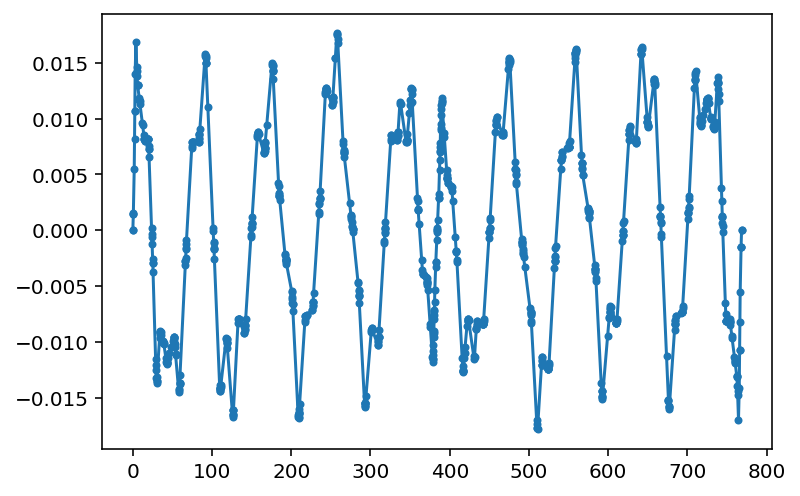

In [19]:
# Simple plot of this data
plt.plot(
    tao.lat_list('*', 'ele.s'),
    tao.lat_list('*', 'orbit.vec.1'),
    marker='.'
)

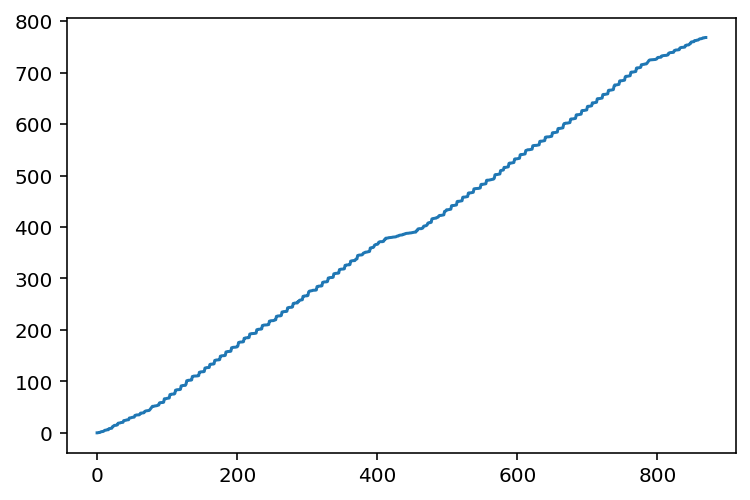

In [20]:
# Be careful with the flags. The defaults are:
plt.plot(tao.lat_list('*', 'ele.s', flags='-array_out -track_only'))

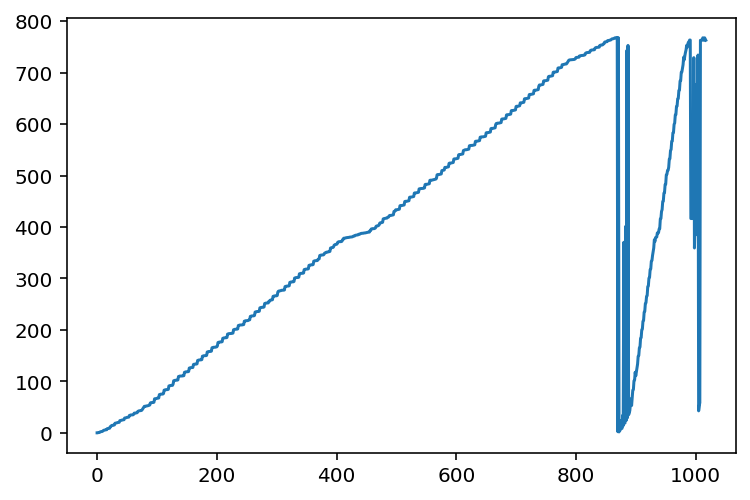

In [21]:
# -index_order will return
plt.plot(tao.lat_list('*', 'ele.s', flags='-array_out -index_order'))

# All method commands

There are many method commands. Please explore the documentation to find the ones that will best suit your needs.

In [22]:
from pytao import interface_commands
all_cmds = [name for name in dir(interface_commands) if not name.startswith('__')]
print(all_cmds)

['beam', 'beam_init', 'bmad_com', 'branch1', 'building_wall_graph', 'building_wall_list', 'building_wall_point', 'building_wall_section', 'bunch1', 'constraints', 'da_aperture', 'da_params', 'data', 'data_d1_array', 'data_d2', 'data_d2_array', 'data_d2_create', 'data_d2_destroy', 'data_d_array', 'data_parameter', 'data_set_design_value', 'datum_create', 'datum_has_ele', 'derivative', 'ele_ac_kicker', 'ele_cartesian_map', 'ele_chamber_wall', 'ele_control', 'ele_cylindrical_map', 'ele_elec_multipoles', 'ele_floor', 'ele_gen_attribs', 'ele_grid_field', 'ele_head', 'ele_lord_slave', 'ele_mat6', 'ele_methods', 'ele_multipoles', 'ele_orbit', 'ele_photon', 'ele_spin_taylor', 'ele_taylor', 'ele_taylor_field', 'ele_twiss', 'ele_wake', 'ele_wall3d', 'em_field', 'enum', 'evaluate', 'floor_orbit', 'floor_plan', 'help', 'inum', 'lat_calc_done', 'lat_ele_list', 'lat_general', 'lat_list', 'lat_param_units', 'matrix', 'merit', 'orbit_at_s', 'parse_tao_python_data', 'place_buffer', 'plot1', 'plot_curve

In [23]:
# There are this many commands:
len(all_cmds)

98

# Other Tao instances

Unfortunately there can only be one Tao instance per process, because the internal structures are held in memory and accessed via ctypes. So this will replace the 

In [24]:
# This looks like a new object...
tao2=Tao('-init $ACC_ROOT_DIR/tao/examples/csr_beam_tracking/tao.init -noplot')   

In [25]:
# ...but internally connects to
tao.lat_list('*', 'ele.name')

Failed to parse string data. Returning raw value. Exception was:  not enough values to unpack (expected 3, got 1)


['BEGINNING',
 'MAR.CSR',
 'FF.PIP00B',
 'FF.BEN01',
 'FF.PIP01',
 'FF.BEN02',
 'FF.PIP02A',
 'MAR.END',
 'END']

## Bunch data

This example has bunch data. The main routine to extract information is:

In [26]:
?tao.bunch1

Signature:
tao.bunch1(
    ele_id,
    *,
    which='model',
    ix_bunch='1',
    coordinate='',
    verbose=False,
    as_dict=True,
)
Docstring:
Bunch parameters at the exit end of a given lattice element.

Parameters
----------
ele_id
    Element name or index
which : default=model
    One of: "model", "base" or "design"
ix_bunch : default=1
coordinate : optional
    If one of: x, px, y, py, z, pz, 's', 't', 'charge', 'p0c', 'state'

Returns
-------
string_list
    if not coordinate
real_array
    if coordinate and coordinate != 'state'
integer_array
    if coordinate == 'state'

Notes
-----
Command syntax:
python bunch1 {ele_id}|{which} {ix_bunch} {coordinate}

Examples
--------
Example: 1
 init: $ACC_ROOT_DIR/tao/examples/csr_beam_tracking/tao.init
 args:
   ele_id: end
   which: model
   ix_bunch: 1
   coordinate:

Example: 2
 init: $ACC_ROOT_DIR/tao/examples/csr_beam_tracking/tao.init
 args:
   ele_id: end
   which: model
   ix_bunch: 1
   coordinate: x
File:      ~/Code/GitHub

In [27]:
# Statistical data
stats = tao.bunch1('end')
stats.keys()

dict_keys(['beta_x', 'alpha_x', 'gamma_x', 'phi_x', 'eta_x', 'etap_x', 'sigma_x', 'sigma_p_x', 'emit_x', 'norm_emit_x', 'beta_y', 'alpha_y', 'gamma_y', 'phi_y', 'eta_y', 'etap_y', 'sigma_y', 'sigma_p_y', 'emit_y', 'norm_emit_y', 'beta_z', 'alpha_z', 'gamma_z', 'phi_z', 'eta_z', 'etap_z', 'sigma_z', 'sigma_p_z', 'emit_z', 'norm_emit_z', 'beta_a', 'alpha_a', 'gamma_a', 'phi_a', 'eta_a', 'etap_a', 'sigma_a', 'sigma_p_a', 'emit_a', 'norm_emit_a', 'beta_b', 'alpha_b', 'gamma_b', 'phi_b', 'eta_b', 'etap_b', 'sigma_b', 'sigma_p_b', 'emit_b', 'norm_emit_b', 'beta_c', 'alpha_c', 'gamma_c', 'phi_c', 'eta_c', 'etap_c', 'sigma_c', 'sigma_p_c', 'emit_c', 'norm_emit_c', 'sigma_11', 'sigma_12', 'sigma_13', 'sigma_14', 'sigma_15', 'sigma_16', 'sigma_21', 'sigma_22', 'sigma_23', 'sigma_24', 'sigma_25', 'sigma_26', 'sigma_31', 'sigma_32', 'sigma_33', 'sigma_34', 'sigma_35', 'sigma_36', 'sigma_41', 'sigma_42', 'sigma_43', 'sigma_44', 'sigma_45', 'sigma_46', 'sigma_51', 'sigma_52', 'sigma_53', 'sigma_54',

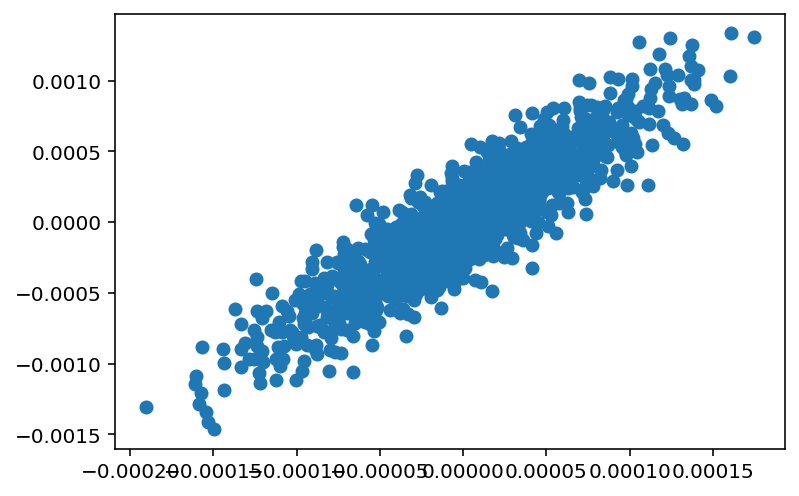

In [28]:
# Array data
x = tao.bunch1('end', coordinate='x')
px = tao.bunch1('end', coordinate='px')
plt.scatter(x, px)

In [29]:
# The state will be returned as an integer array. 
state = tao.bunch1('end', coordinate='state')
state.dtype

dtype('<i4')

# ParticleGroup from openPMD-beamphysics

openPMD-beamphysics is an external package that can be useful for further bunch analysis, plotting, and conversion. 

https://github.com/ChristopherMayes/openPMD-beamphysics

Here is example usage to extract bunch data and instantiate as a ParticleGroup object.

*Note that the momentum units in openPMD-beamphysics are in eV/c, whereas Bmad's momenta are normalized by a refrence momentum.*

In [30]:
from pmd_beamphysics import ParticleGroup

In [31]:
# This data is suitable for the ParticleGroup class
data = tao.bunch_data('end')
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

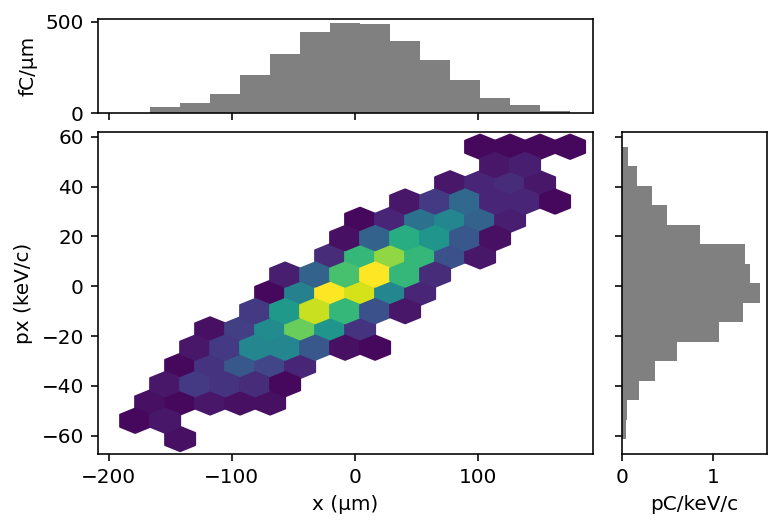

In [32]:
P = ParticleGroup(data=data)

P.plot('x', 'px')

In [33]:
# Tao's write format is already in the openPMD-beamphysics, so particles can be written and read in this way as well.
tao.cmd('write beam -at end test.h5')

['[INFO] tao_write_cmd:', '    Written: test.h5']

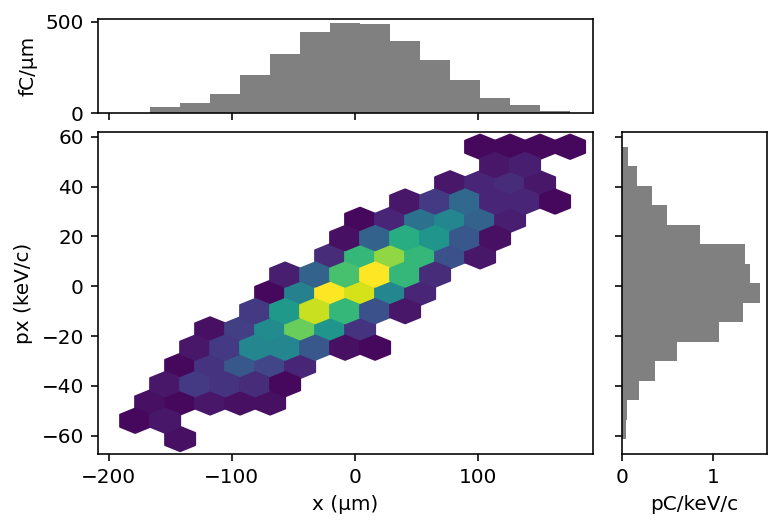

In [34]:
P2 = ParticleGroup('test.h5')
P2.plot('x', 'px')

In [35]:
# Cleanup
!rm test.h5